In [1]:
from IPython.display import Image

### Probability:

The probability of an event, X, occurring is P(X). The value of P(X) must fall in a range of 0 to 1.

   **0 <= P(X) <= 1**
   
An event, X, can have multiple outcomes which we might call X1, X2, .. and so on; the probabilities for all outcomes of X must add up to one. For example, say there are two possible outcomes, X1 and X2:

If P(X1) = 0.2 then P(X2) = 0.8 because all possible outcomes must sum to 1.


**Independent Events**

Events like coin flips are known as independent events; this means that the probability of a single flip does not affect the probability of another flip; P(H) will be 0.5 for each fair coin flip. When flipping a coin multiple times, each flip is an independent event because one flip does not affect the probability that another flip will land heads up or tails up.

**Dependent Events**

When two events are said to be dependent, the probability of one event occurring influences the likelihood of the other event. For example, say you are more likely to go outside if it's sunny weather. If the probability of sunny weather is low on a given day, the probability of you going outside will decrease as well, so the probability of going outside is dependent on the probability of sunny weather.

**Joint Probability**

The probability that two or more independent events will occur together (in the same time frame) is called a joint probability, and it is calculated by multiplying the probabilities of each independent event together. For example, the probability that you will flip a coin and it will lands heads up two times in a row can be calculated as follows:

The probability of a coin flipping heads up, P(H) = 0.5
The joint probability of two events (a coin landing heads up) happening in a row, is the probability of the first event times the probability of the second event: P(H)*P(H) = (0.5)*(0.5) = 0.25


**Quantifying Certainty (and Uncertainty)**

When we talk about being certain that a robot is at a certain location (x, y), moving a certain direction, or sensing a certain environment, we can quantify that certainty using probabilistic quantities. Sensor measurements and movement all have some uncertainty associated with them (ex. a speedometer that reads 50mph may be off by a few mph, depending on whether a car is moving up or down hill).

### Bayes' Rule

Bayes' Rule is extremely important in robotics and it can be summarized in one sentence: given an initial prediction, if we gather additional data (data that our initial prediction depends on), we can improve that prediction!

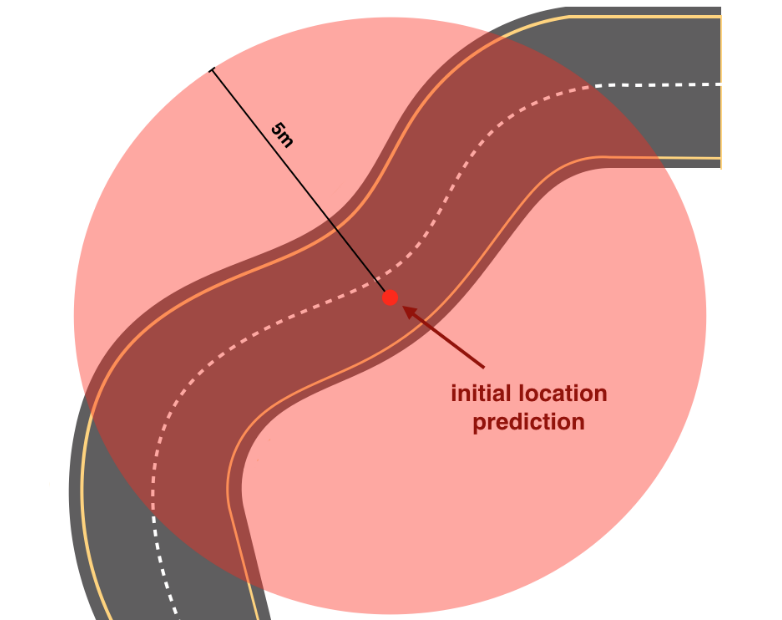

In [2]:
Image("/Users/mayurjain/Desktop/cv_images/uncertainity_bayes_rule.png")

We know a little bit about the map of the road that a car is on (pictured above). We also have an initial GPS measurement; the GPS signal says the car is at the red dot. However, this GPS measurement is inaccurate up to about 5 meters. So, the vehicle could be located anywhere within a 5m radius circle around the dot.

### Sensors

Then we gather data from the car's sensors. Self-driving cars mainly use three types of sensors to observe the world:

**Camera**, which records video,

**Lidar**, which is a light-based sensor, and

**Radar**, which uses radio waves.

All of these sensors detect surrounding objects and scenery.

Autonomous cars also have lots of internal sensors that measure things like the speed and direction of the car's movement, the orientation of its wheels, and even the internal temperature of the car!

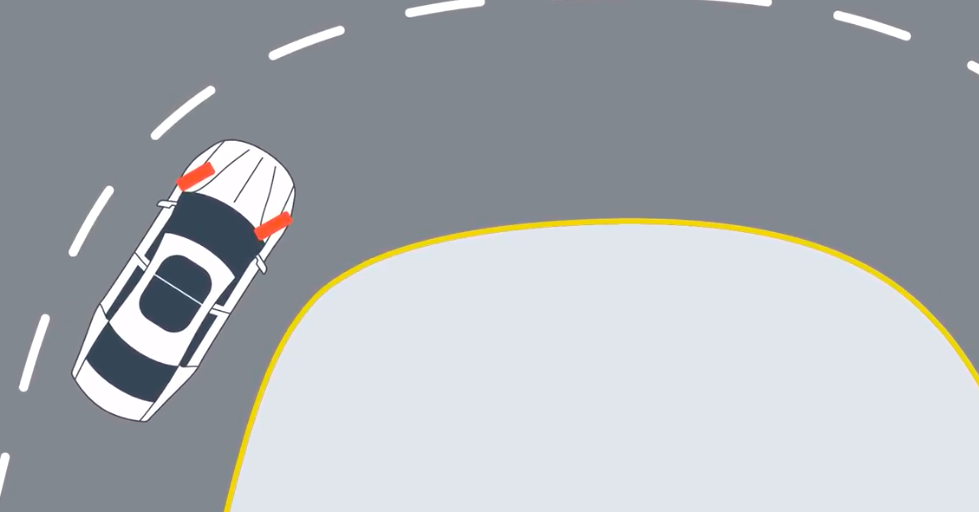

In [3]:
Image("/Users/mayurjain/Desktop/Location_detection.png")

Once we gather sensor data about the car's surroundings and its movement,
we can then use this information to improve our initial location prediction.
For example, say we sense lane markers and specific terrain.
Actually, we know from
previously collected data that if we sense landlines close to the sides of the car,
the car is probably located in the center of the lane.
We also know that if we sense that our tires are pointing to the right,
we're probably on a curved section of the road.
So this sensor data,
combined with what we already know about the road and the car,
gives us more information about where our location is most likely to be.
So using the sensor information,
we can improve our initial prediction and better estimate our car's location.

### What is a Probability Distribution?

Probability distributions allow you to represent the probability of an event using a mathematical equation. Like any mathematical equation:

**1. probability distributions can be visualized using a graph especially in 2-dimensional cases.**

**2. probability distributions can be worked with using algebra, linear algebra and calculus.**

These distributions make it much easier to understand and summarize the probability of a system whether that system be a coin flip experiment or the location of an autonomous vehicle.

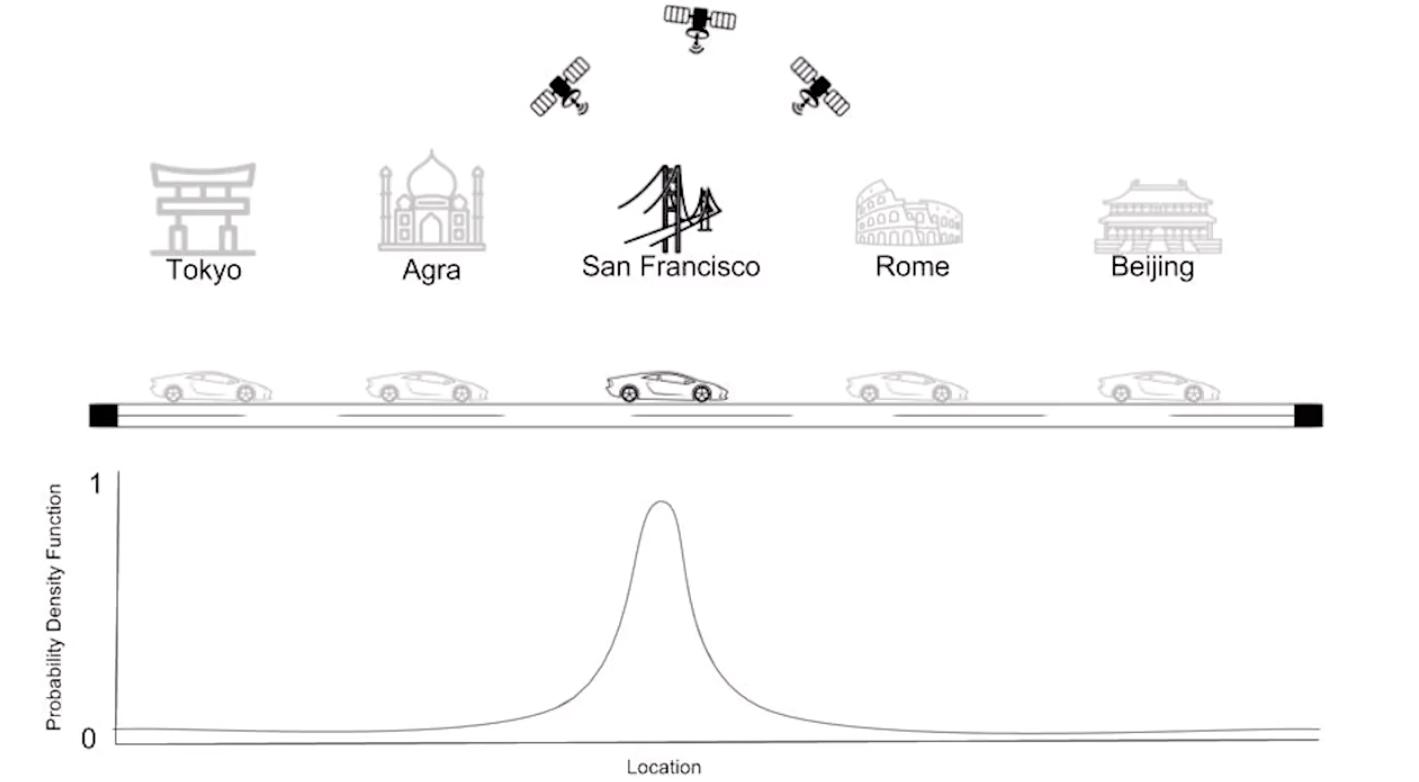

In [4]:
Image("/Users/mayurjain/Desktop/Probability Distribution.png")

Consider the above image, When the car's location is unknown, the probability distribution is constant everywhere. But after getting the GPS location, we can see certain change in probability distribution as shown with respect to the image above.

If you have no idea where a car is located in the world
the probability distribution for its location will look completely flat.
The probability of it being anywhere say in
San Francisco or in Tokyo will be the exact same.
The probability that the car will be at any particular location will
be a constant value that's the same at every location.
So the probability distribution can be represented
by a constant horizontal line on a graph,
that shows the probability of all of these outcomes.
But as we gather more information,
this distribution will change.
Say we get a GPS sensor reading that tells
us that we're a lot closer to San Francisco than to Tokyo.
The location probability goes up near
the GPS measurement and the probability
goes down in regions far from the GPS measurement.
And even though the GPS signal isn't perfect you
have more information about the likely location of your car.
The vehicle is never 100 percent sure of its location,
yet through sensing the vehicle increases its certainty.
The shape of the probability distribution tells you
the most likely locations and the least likely locations of the vehicle.
Probability distributions are really useful ways to visualize and represent uncertainty,
not just in single vehicle localization
but also in tracking the locations of pedestrians,
bicycles and other moving vehicles around a car.
These distributions are also used in representing uncertainty in sensor measurements.
Remember that autonomous vehicles are robots on wheels.
So everything from sensing,
measuring and moving will involve some uncertainty.

### Types of Probability Distributions

Probability distributions are really helpful for understanding the probability of a system.
Looking at the big pictures, there are two types of probability distributions:

**discrete probability distributions**

**continuous probability distributions**

Before we get into the details about what discrete and continuous mean, take a look at these two visualizations below. The first image shows a discrete probability distribution and the second a continuous probability distribution. 

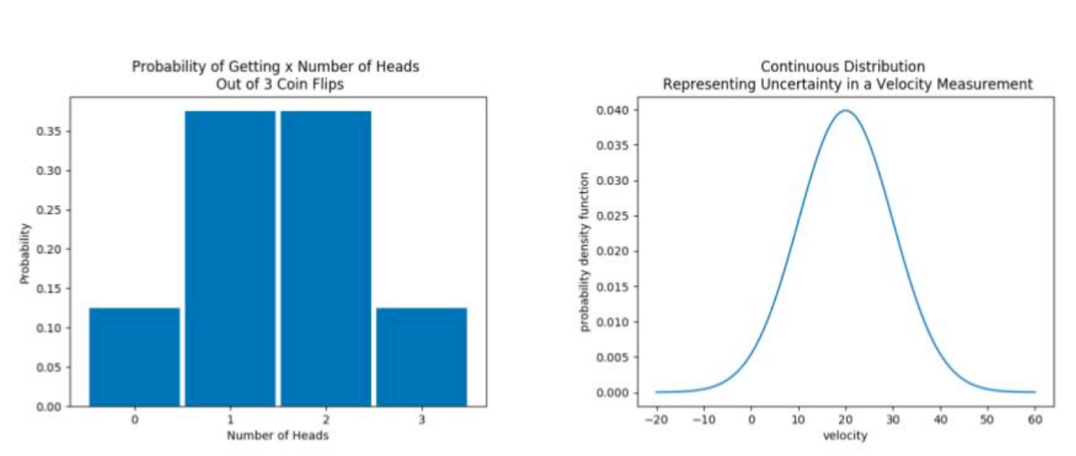

In [5]:
Image("/Users/mayurjain/Desktop/Continous_vs_Discrete.png")

Prior - a prior probability distribution of an uncertain quantity, such as the location of a self-driving car on a road. This is the probability distribution that would express one's beliefs about the car's location **before** some sensor measurements or other evidence is taken into account.

Posterior - the probability distribution of an uncertain quantity, after some evidence (like sensor measurements) have been taken into account.

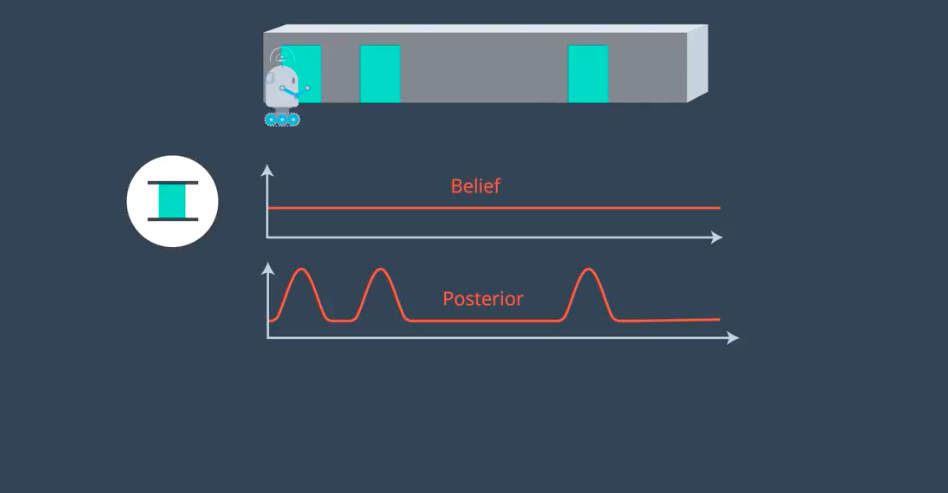

In [7]:
Image("/Users/mayurjain/Desktop/Total Probability_1.png")

Let me begin my story in a world where
a robot resides and let's assume the robot has no clue where it is.
Then we will model this with a function,
The vertical axis is the probability for any location in
this world and the horizontal axis
corresponds to all the places in this one-dimensional world.
To model the robot's current belief about where it might be or
it's confusion is by a uniform function that
assigns equal weights to every possible place in this world.
This is the state of maximum confusion.


Now to localize the bot has they have some distinctive features,
let's assume there's three different landmarks in the world.
There are three doors and let's assume they are all look alike.
They're not distinguishable, but we can
distinguish the door from the non door area of the wall.
Now let's see how the robot can localize itself by assuming it senses,
and it senses that it is standing right next to a door.
All it knows now that is located likely next to a door.
How will this affect our belief?
Here is the critical step for localization.

The measurement of a door transforms our belief function,
defined over possible locations to a new function.
For the three locations adjacent to doors,
we now have an increased belief of being
there whereas all the other locations have a decreased belief.
This is a probability distribution that assigns
high probability for being next to a door and it's called the
posterior belief with the word posterior means it's after a measurement has been taken.
Now the key aspects of this belief is that we still don't know where we are,
there's three possible locations and in fact,
it might be that the sensors were
erroneous and we accidentally saw a door where there is none,
but these three bumps to get them really express our current best belief of where we are.
This representation is absolutely core to probability and to movable localization.

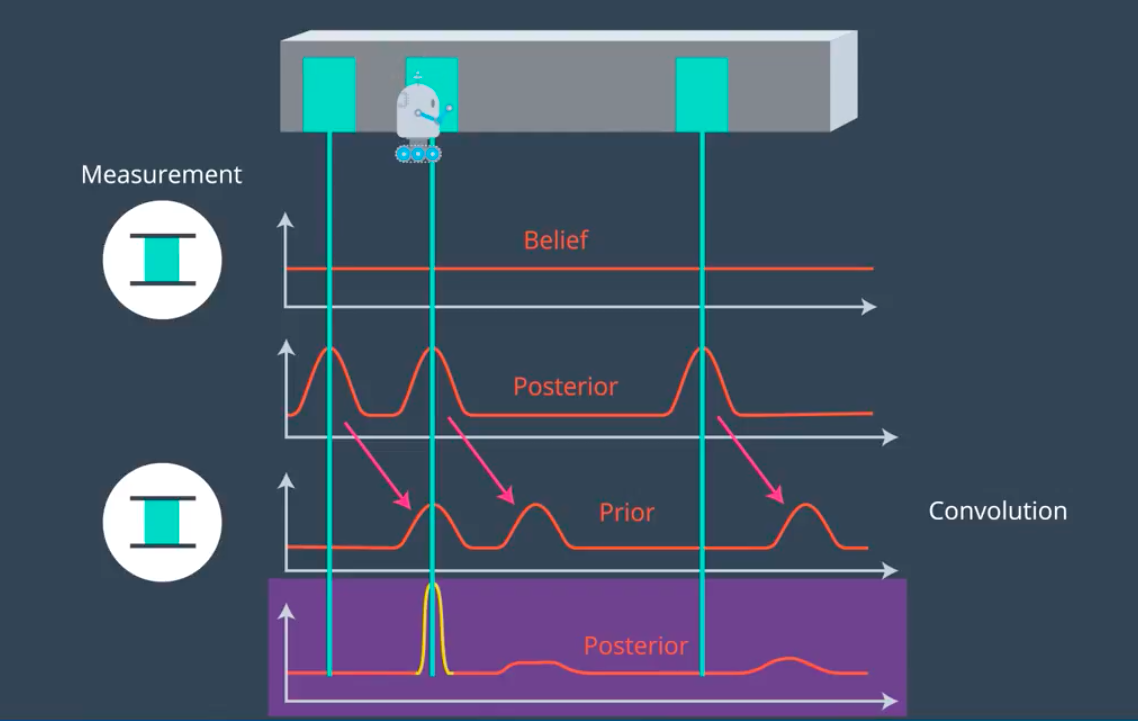

In [8]:
Image("/Users/mayurjain/Desktop/Total Probability_2.png")

Now let's assume the robot moves to the right by a certain distance, then we can shift the belief according to the motion. And all three distribution moves in right direction. The robot it knows it's heading direction, it's moving to the right in this example. But it knows roughly how far it moved. Now robot motion is somewhat uncertain, we can never be certain where the robot moved. The distribution will be flatter at places other than doors. The process of moving those beliefs to right are essentially called a **convolution**.

Let's now assume the robot senses again and finds itself right next to a door again, so the measurement is the same as before. We end up multiplying our belief which is now prior to the second measurement, which has a peak at each door. There's a couple of minor bumps but there is one big bump. This one corresponds to this guy over here in the prior and it's the only place in this prior that really corresponds to the measurement of a door whereas all the other places of doors have a low prior belief.

As a result this function is really interesting, it's a distribution that focuses most of its weight under the correct hypothesis of the bot being on the second door and it provides very little belief to places far away from doors. At this point our robot has localized itself.